#  Credit Card Fraud Detection

![fraude](fraude.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Welcome" data-toc-modified-id="Welcome-0">Welcome</a></span></li><li><span><a href="#What-does-it-mean-fraud?" data-toc-modified-id="What-does-it-mean-fraud?-1">What does it mean fraud?</a></span></li><li><span><a href="#Important-libraries" data-toc-modified-id="Important-libraries-2">Important libraries</a></span></li><li><span><a href="#DataSet-description" data-toc-modified-id="DataSet-description-3">DataSet description</a></span></li><li><span><a href="#Understanding-our-data" data-toc-modified-id="Understanding-our-data-4">Understanding our data</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-5">Correlation analysis</a></span></li><li><span><a href="#Fraud/-non-Fraud-ratio" data-toc-modified-id="Fraud/-non-Fraud-ratio-6">Fraud/ non-Fraud ratio</a></span></li><li><span><a href="#Traditional-way-of-catching-fraud" data-toc-modified-id="Traditional-way-of-catching-fraud-7">Traditional way of catching fraud</a></span></li><li><span><a href="#Machine-Learning-models" data-toc-modified-id="Machine-Learning-models-8">Machine Learning models</a></span><ul class="toc-item"><li><span><a href="#Train-/-Test-sets" data-toc-modified-id="Train-/-Test-sets-8.1">Train / Test sets</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-8.2">Logistic Regression</a></span></li></ul></li><li><span><a href="#KNN" data-toc-modified-id="KNN-9">KNN</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-10">Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-11">Random Forest</a></span></li><li><span><a href="#Adaboots" data-toc-modified-id="Adaboots-12">Adaboots</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-13">Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Histogram-based-Gradient-Boosting-Classification-Tree" data-toc-modified-id="Histogram-based-Gradient-Boosting-Classification-Tree-13.1">Histogram-based Gradient Boosting Classification Tree</a></span></li></ul></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-14">Model Comparison</a></span></li><li><span><a href="#Logistic-Regression-with-hyperparameter-tunning" data-toc-modified-id="Logistic-Regression-with-hyperparameter-tunning-15">Logistic Regression with hyperparameter tunning</a></span></li><li><span><a href="#Synthetic-Minority-Oversampling-Technique-(SMOTE)" data-toc-modified-id="Synthetic-Minority-Oversampling-Technique-(SMOTE)-16">Synthetic Minority Oversampling Technique (SMOTE)</a></span></li><li><span><a href="#Logistic-Regression-combined-with-SMOTE" data-toc-modified-id="Logistic-Regression-combined-with-SMOTE-17">Logistic Regression combined with SMOTE</a></span></li></ul></div>

## Welcome

## What does it mean fraud?

## Important libraries

In [1]:
#pandas and numpy
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#hyperparameters tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

#model performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline 
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from collections import Counter

#others
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree
from sklearn import metrics



## DataSet description

In [2]:

df=pd.read_csv("Data/creditcard/creditcard_sampledata_3.csv")
df.head()


Unnamed: 0        V1        V2        V3        V4        V5        V6  \
0      258647  1.725265 -1.337256 -1.012687 -0.361656 -1.431611 -1.098681   
1       69263  0.683254 -1.681875  0.533349 -0.326064 -1.455603  0.101832   
2       96552  1.067973 -0.656667  1.029738  0.253899 -1.172715  0.073232   
3      281898  0.119513  0.729275 -1.678879 -1.551408  3.128914  3.210632   
4       86917  1.271253  0.275694  0.159568  1.003096 -0.128535 -0.608730   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.842274 -0.026594 -0.032409  ...  0.414524  0.793434  0.028887  0.419421   
1 -0.520590  0.114036 -0.601760  ...  0.116898 -0.304605 -0.125547  0.244848   
2 -0.745771  0.249803  1.383057  ... -0.189315 -0.426743  0.079539  0.129692   
3  0.356276  0.920374 -0.160589  ... -0.335825 -0.906171  0.108350  0.593062   
4  0.088777 -0.145336  0.156047  ...  0.031958  0.123503 -0.174528 -0.147535   

        V25       V26       V27       V28  Amount  Class  
0 -0.367529 -0.155634 -0.015768  0.010790  189.00      0  
1  0.069163 -0.460712 -0.017068  0.063542  315.17      0  
2  0.002778  0.970498 -0.035056  0.017313   59.98      0  
3 -0.424303  0.164201  0.245881  0.071029    0.89      0  
4  0.735909 -0.262270  0.015577  0.015955    6.53      0  

[5 rows x 31 columns]

## Understanding our data


In [5]:
df.describe()

Unnamed: 0           Time           V1           V2           V3  \
count  8000.00000    8000.000000  8000.000000  8000.000000  8000.000000   
mean   3999.50000   95357.290375     0.016628    -0.005726    -0.010398   
std    2309.54541   46956.240862     1.899212     1.545809     1.477050   
min       0.00000      64.000000   -29.973363   -29.198899   -19.947726   
25%    1999.75000   55189.750000    -0.915243    -0.610001    -0.893566   
50%    3999.50000   85758.000000     0.025737     0.040064     0.165369   
75%    5999.25000  139042.750000     1.321858     0.784179     0.991859   
max    7999.00000  172766.000000     2.373022    11.447082     3.985446   

                V4           V5           V6           V7           V8  ...  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000  ...   
mean     -0.028731    -0.022065     0.000739     0.016121    -0.004941  ...   
std       1.426184     1.401964     1.332905     1.305012     1.174568  ...   
min      -5.416315   -40.427726    -7.810116   -21.234463   -26.069936  ...   
25%      -0.903137    -0.714806    -0.790640    -0.560447    -0.215935  ...   
50%      -0.035525    -0.076317    -0.282476     0.043119     0.019278  ...   
75%       0.752604     0.601602     0.403259     0.581711     0.331131  ...   
max       9.074932    13.815072    23.917837    44.054461     9.561121  ...   

               V21          V22          V23          V24          V25  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.003501     0.028278     0.006422    -0.000855    -0.000284   
std       0.678019     0.714746     0.553929     0.606846     0.513374   
min     -13.950186    -4.910197   -12.667179    -2.814898    -3.223535   
25%      -0.221765    -0.519427    -0.159989    -0.345288    -0.311490   
50%      -0.026597     0.031274    -0.008716     0.038126     0.023790   
75%       0.191495     0.549468     0.144751     0.440633     0.344371   
max      14.507345     4.222704    19.228169     3.577753     2.520869   

               V26          V27          V28        Amount        Class  
count  8000.000000  8000.000000  8000.000000   8000.000000  8000.000000  
mean      0.000740    -0.006161     0.005893     89.669246     0.002125  
std       0.485101     0.394584     0.348770    260.188804     0.046052  
min      -1.511259    -5.809357    -3.693525      0.000000     0.000000  
25%      -0.327823    -0.071358    -0.052957      5.990000     0.000000  
50%      -0.061720     0.000514     0.011239     22.855000     0.000000  
75%       0.246298     0.086333     0.076835     78.432500     0.000000  
max       2.693658     5.352193    15.649134  10199.440000     1.000000  

[8 rows x 32 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

In [7]:
#Do we have any missing value?
df.isna().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [8]:
#According to the dataset description the features from "V1" to "V28" are the result of PCA(Principal Components Analysis). 
#We know that features must be scaled before using this technique. 
#However the features "Time" and "Amount" are not scaled we should scaled them before continuing with our analysis. 

df['Amount_scaled'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_scaled'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

#Now we have to drop from our dataset the features "Time" and "Amount":
df=df.drop(columns=['Amount', 'Time'],axis=1)


In [9]:
list(df.columns) 
df = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount_scaled','Time_scaled','Class']]
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.212511 -0.099054 -1.192094  0.286324  2.160516  3.616314 -0.404207   
1 -0.658305  0.406791  2.037461 -0.291298  0.147910 -0.350857  0.945373   
2  1.105253  0.541842  0.839421  2.570933 -0.279517 -0.423062  0.088019   
3  1.239495 -0.182609  0.155058 -0.928892 -0.746227 -1.235608 -0.061695   
4 -1.571359  1.687508  0.734670  1.293350 -0.217532 -0.002677  0.147364   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.842331  0.169360 -0.030522  ... -0.494695 -0.149785  1.011227  0.883548   
1 -0.172560  0.025133 -0.778135  ... -0.238805  0.089877  0.421195 -0.352487   
2  0.011622 -0.715756  0.651379  ... -0.460991  0.189397  0.556329  0.185786   
3 -0.125223  0.984938 -0.746625  ...  0.481119 -0.140019  0.538261  0.710720   
4  0.515362 -0.372442  0.078021  ...  0.377256 -0.030436  0.117608 -0.060520   

        V26       V27       V28  Amount_scaled  Time_scaled  Class  
0 -0.329434  0.020370  0.017037      -0.211280    -2.029533      0  
1  0.074783 -0.094192 -0.092493      -0.133293    -2.029533      0  
2 -0.189030  0.000208  0.026167      -0.320669    -2.028255      0  
3 -0.621382  0.036867  0.010963      -0.310829    -2.028170      0  
4 -0.296550 -0.481570 -0.167897      -0.306217    -2.028085      0  

[5 rows x 31 columns]

## Correlation analysis

In [10]:
#Correlation between the features and the dependent variable "Class":

df[df.columns[0:]].corr()['Class'][:].sort_values(ascending=False)

Class            1.000000
V11              0.121299
V4               0.091571
V2               0.039491
V27              0.031831
V21              0.024850
V19              0.024780
V28              0.016667
V25              0.014009
V22              0.008454
V26              0.003618
V8              -0.004084
Amount_scaled   -0.004325
V15             -0.006357
V23             -0.010480
V24             -0.010892
Time_scaled     -0.012145
V20             -0.017368
V13             -0.027589
V5              -0.030261
V6              -0.041044
V9              -0.063941
V1              -0.079022
V18             -0.089163
V3              -0.117224
V7              -0.125326
V16             -0.166754
V10             -0.170283
V12             -0.209598
V14             -0.242450
V17             -0.281689
Name: Class, dtype: float64

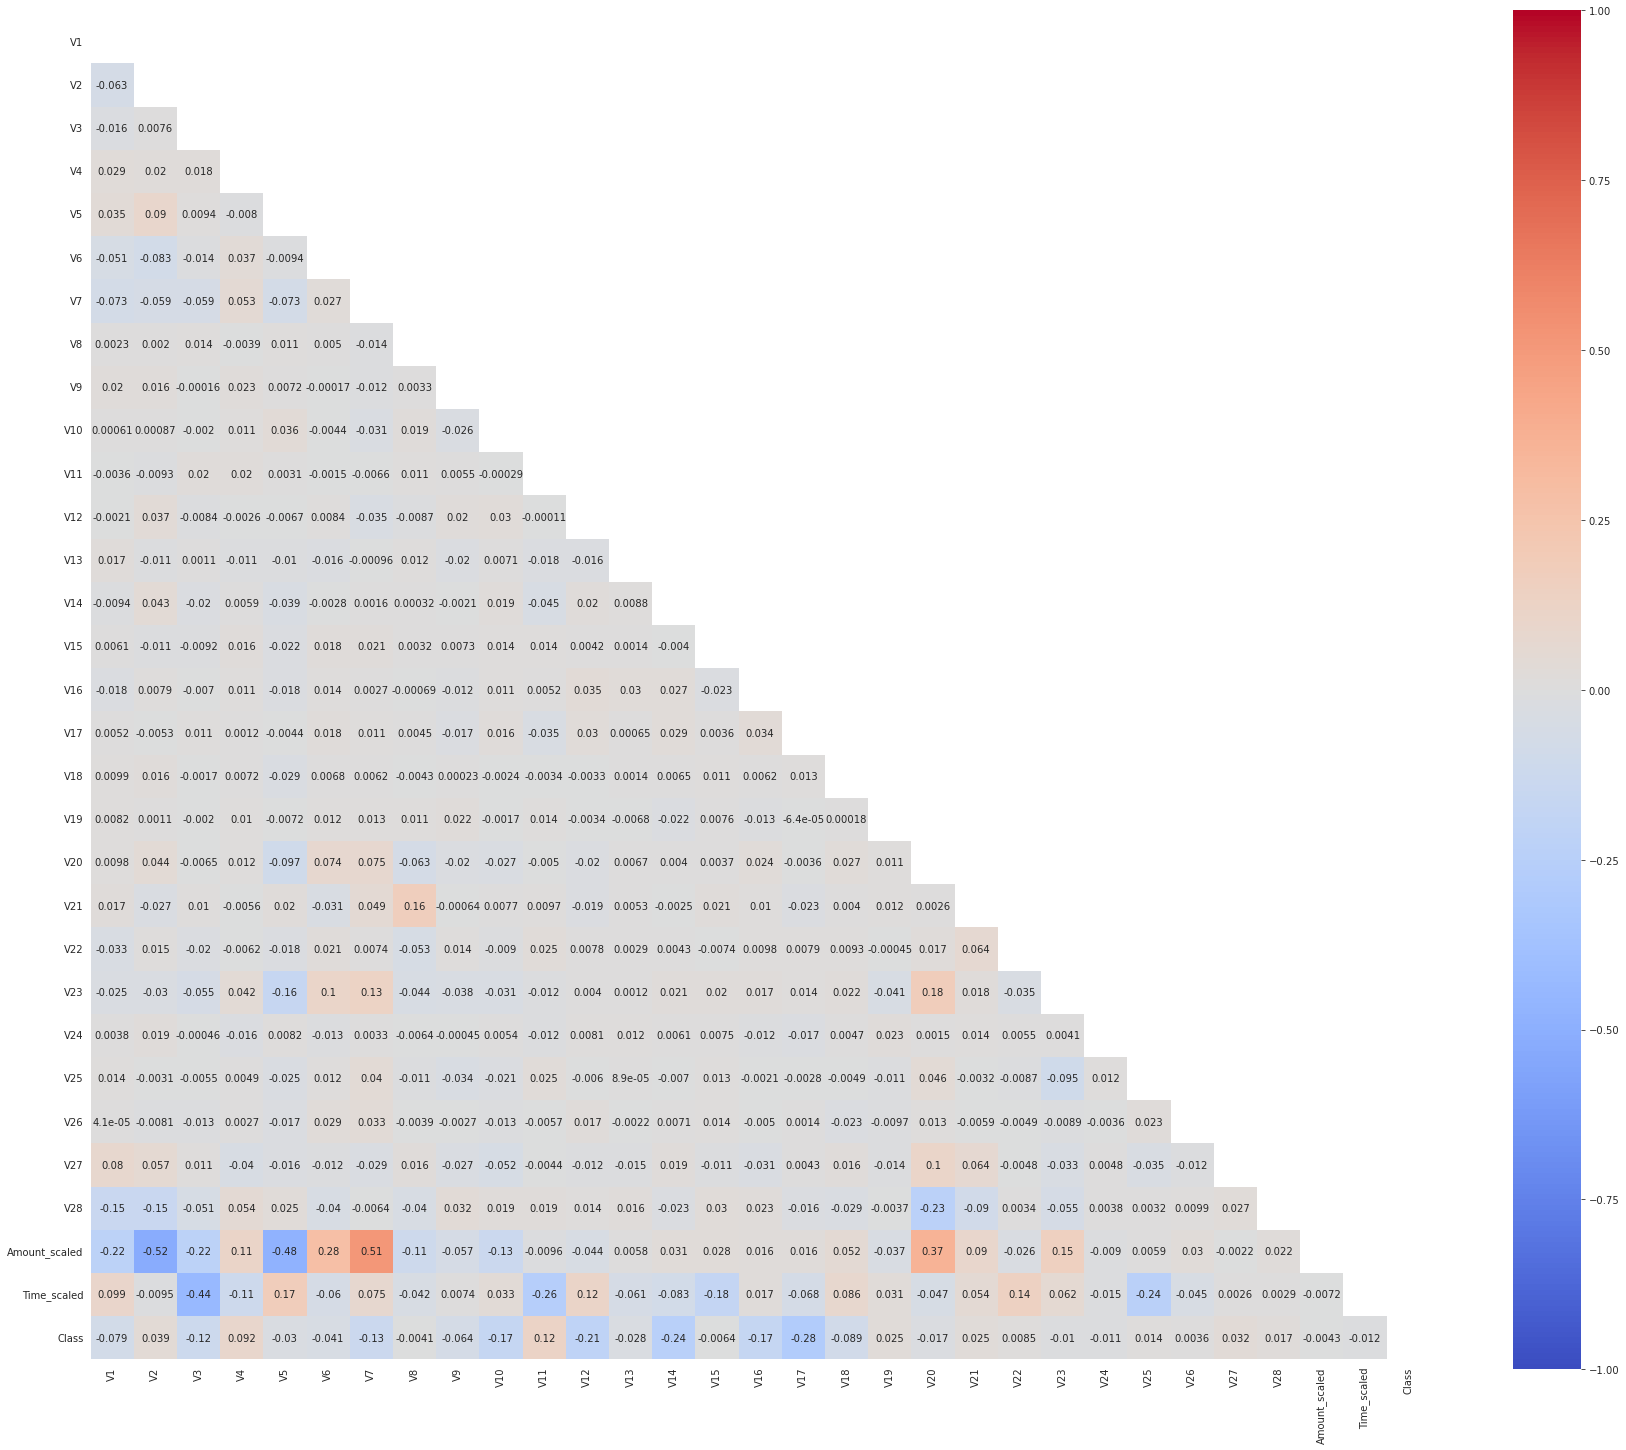

In [11]:
#Correlation matrix:

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 25))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Fraud/ non-Fraud ratio

 the feature "Class" is our target variable. This variable has two possible values: 
 1 for fraudulent transactions and 0 for no fraudulent transactions. 
A very commun problem in classification datasets is classs imbalance. This means that the dataset contains an imbalance number of fraudulents and no-fraudulents transactions. ML algorithms works better when the different classes are equally represented  

In [12]:
y=df['Class'].value_counts()
y

0    7983
1      17
Name: Class, dtype: int64

In [13]:
#ratio of fraudulent transactions
y/len(df)

0    0.997875
1    0.002125
Name: Class, dtype: float64

We can see that fraudulent transactions represent only 0.1727% of our datasets meanwhile non-fraudulent transactions respresent 99.8273%.
it is confirmed we have class imbalance in our dataset. 
 


C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

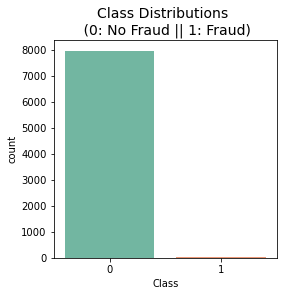

In [14]:
#Visualizations can be very a powerful tool to detect class imbalance:

fig,ax=plt.subplots(figsize=(4,4))
sns.countplot('Class', data=df, palette="Set2")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [10]:
#We can also use a scatter plot to see our class imbalance. 
#First, we need to convert our dataframe in 2 variables:

X=df.iloc[:,0:30].values
y=df.Class.values


In [11]:
def plot_data(X: np.ndarray, y: np.ndarray):
    
 
    sns.set_palette("Set2")
    
    sns.scatterplot(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    sns.scatterplot(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15)
    
    plt.legend()
    
    return plt.show()

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


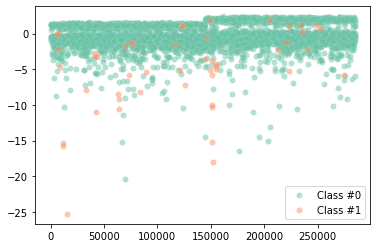

In [12]:
plot_data(X,y)

The plot helps us to see the data imbalance problem very clear. 

## Traditional way of catching fraud
First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.


In [18]:
df.groupby('Class').mean()

V1        V2        V3        V4        V5        V6        V7  \
Class                                                                         
0      0.023553 -0.008543 -0.002408 -0.034757 -0.020108  0.003264  0.023668   
1     -3.235382  1.317054 -3.762234  2.801140 -0.941354 -1.184692 -3.527826   

             V8        V9       V10  ...       V21       V22       V23  \
Class                                ...                                 
0     -0.004720 -0.010660  0.012242  ... -0.004279  0.027999  0.006689   
1     -0.108892 -1.546536 -4.112638  ...  0.361582  0.159210 -0.119366   

            V24       V25       V26       V27       V28  Amount_scaled  \
Class                                                                    
0     -0.000550 -0.000616  0.000659 -0.006740  0.005625       0.000200   
1     -0.144082  0.155552  0.038765  0.265996  0.131853      -0.093713   

       Time_scaled  
Class               
0         0.000560  
1        -0.263179  

[2 rows x 30 columns]

In [19]:
# Implement a rule for stating which cases are flagged as fraud
df['predicted_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V7'] < -5), 1, 0)

In [20]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.predicted_fraud, rownames=['Fraud'], colnames=['Predicted_Fraud']))

Predicted_Fraud     0   1
Fraud                    
0                7958  25
1                  13   4


With this first approach we have detected 157 of 492 fraudulent cases, and we got 824 false positives. Now we will see how we can improve these numbers with ML

In [21]:
#We do not need the feature "flag as fraud" for this analysis, so I will delete it
df=df.drop(columns=['predicted_fraud'])

## Machine Learning models

### Train / Test sets

In [22]:
# XY split:

X=df.drop('Class', axis=1)
y=df.Class


In [23]:
#Create training and test set:

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1000)

### Logistic Regression 

In [24]:

#Define our model
logreg=LogisticRegression()


#fit our the model with our training set
logreg.fit(X_train,y_train)


# Get predicting values
y_predicted_logreg=logreg.predict(X_test)
#predicted_y_train=model.predict(X_train)


In [25]:

#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_logreg))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2393
           1       1.00      0.29      0.44         7

    accuracy                           1.00      2400
   macro avg       1.00      0.64      0.72      2400
weighted avg       1.00      1.00      1.00      2400



Confusion matrix for the test set
[[2393    0]
 [   5    2]]


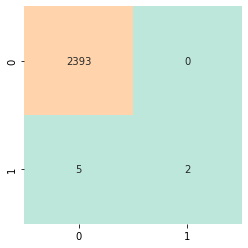

In [26]:

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_logreg))
conf_mat = confusion_matrix(y_test,y_predicted_logreg)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()



In [27]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of logistic regression classifier: ",roc_auc_score(y_test, y_pred_probs))

roc_auc_score of logistic regression classifier:  0.9363620082383142


## KNN

In [28]:

#Define the model with our best parameters and the resampling:
knn=KNeighborsClassifier()


##fit our pipeline with our training set
knn.fit(X_train,y_train)


# Get predicting values
y_predicted_knn=knn.predict(X_test)


In [29]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_knn))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2393
           1       1.00      0.29      0.44         7

    accuracy                           1.00      2400
   macro avg       1.00      0.64      0.72      2400
weighted avg       1.00      1.00      1.00      2400



Confusion matrix for the test set
[[2393    0]
 [   5    2]]


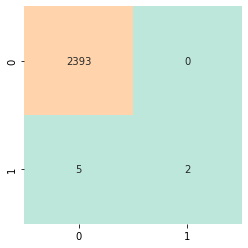

In [30]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_knn))
conf_mat = confusion_matrix(y_test,y_predicted_knn)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()


In [31]:
# Predict probabilities
y_pred_probs_knn = knn.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of knn classifier: ",roc_auc_score(y_test, y_pred_probs_knn))

roc_auc_score of knn classifier:  0.9277356575726822


## Decision Trees

In [ ]:
#Let's use GridSearchCV in order to find the best parameters for our decision tree
hyperparameters = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

gridsearch = GridSearchCV(DecisionTreeClassifier(), hyperparameters, scoring='accuracy', n_jobs=-1, cv=cv)
best_model = gridsearch.fit(X_train, y_train)
print(best_model.best_params_)

In [32]:

#Define the model with our best parameters and the resampling:
dtc= DecisionTreeClassifier()


##fit our pipeline with our training set
dtc.fit(X_train,y_train)


# Get predicting values
y_predicted_dtc=dtc.predict(X_test)

#predicted_y_train=model.predict(X_train)



In [33]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_dtc))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2393
           1       0.75      0.43      0.55         7

    accuracy                           1.00      2400
   macro avg       0.87      0.71      0.77      2400
weighted avg       1.00      1.00      1.00      2400



Confusion matrix for the test set
[[2392    1]
 [   4    3]]


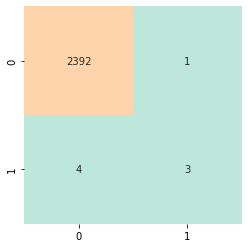

In [34]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_dtc))
conf_mat = confusion_matrix(y_test,y_predicted_dtc)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()



performance_model = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, predicted_y_train),
                                         precision_score(y_train, predicted_y_train),
                                         recall_score(y_train, predicted_y_train)],
                               'Test': [accuracy_score(y_test, predicted_y_test),
                                        precision_score(y_test, predicted_y_test),
                                        recall_score(y_test, predicted_y_test)]})
display(performance_model)

In [35]:
# Predict probabilities
y_pred_probs_dtc = dtc.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of decision tree classifier: ",roc_auc_score(y_test, y_pred_probs_dtc))

roc_auc_score of decision tree classifier:  0.7140767715360277


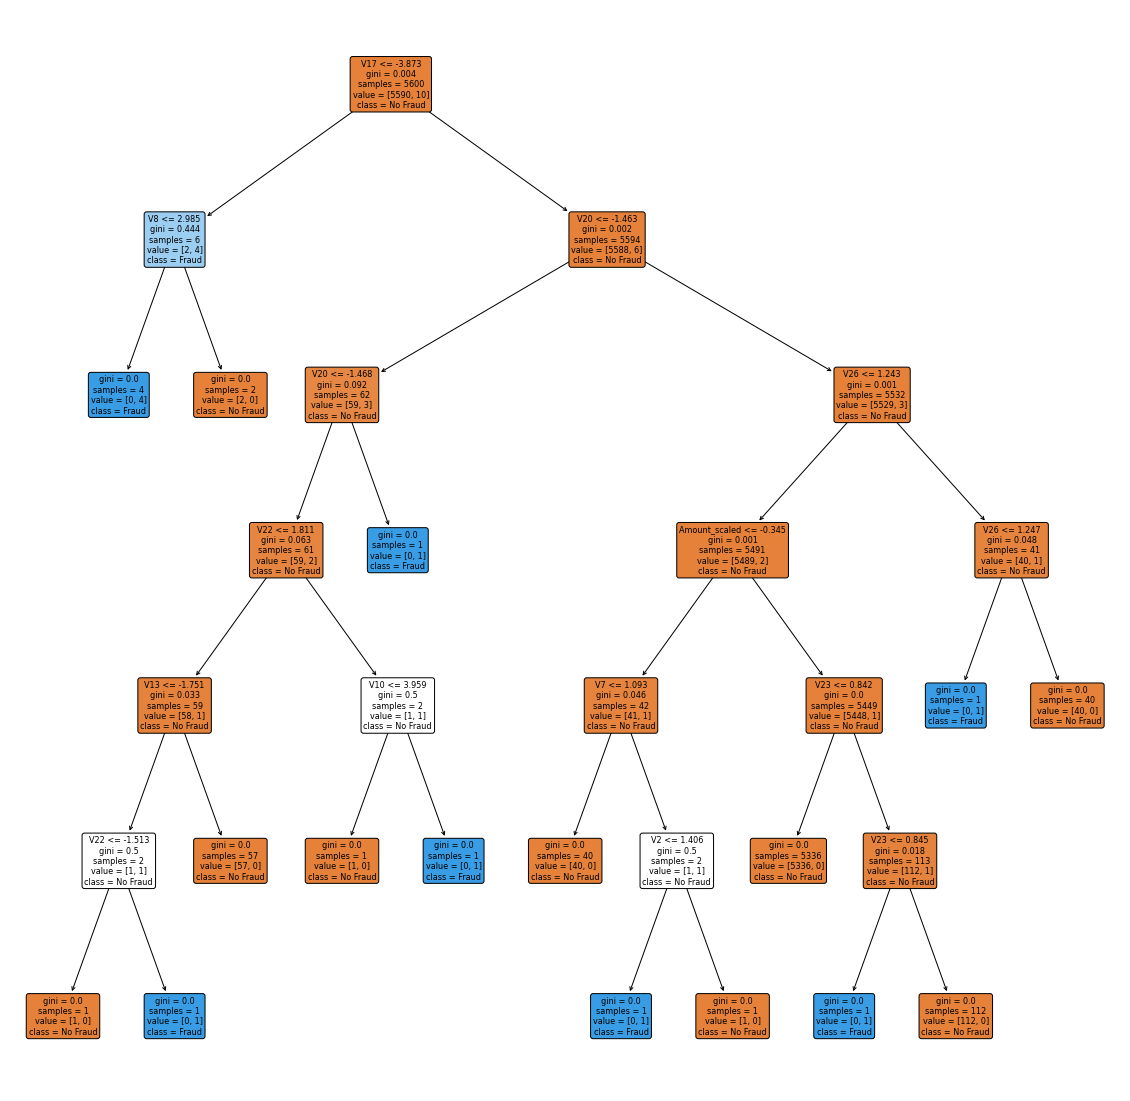

In [36]:
# Tree Representation :
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))


plot_tree(dtc,filled = True, rounded=True,feature_names=X.columns, class_names=['No Fraud', "Fraud"])
plt.show() 

## Random Forest

In [ ]:
#Let's use GridSearchCV in order to find the best parameters for our random forest


hyperparameters = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}


gridsearch = GridSearchCV(RandomForestClassifier(), hyperparameters, scoring='accuracy', n_jobs=-1, cv=cv)
best_model = gridsearch.fit(X_train, y_train)
print(best_model.best_params_)

In [37]:
#Define model with our best parameters
rfc= RandomForestClassifier()


#fit our pipeline with our training set
rfc.fit(X_train,y_train)

# Get predicting values
y_predicted_rfc=rfc.predict(X_test)

#predicted_y_train=model.predict(X_train)

In [38]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_rfc))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2393
           1       0.00      0.00      0.00         7

    accuracy                           1.00      2400
   macro avg       0.50      0.50      0.50      2400
weighted avg       0.99      1.00      1.00      2400



C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for the test set
[[2393    0]
 [   7    0]]


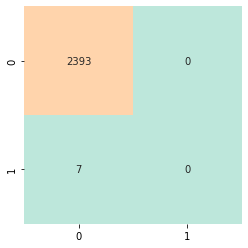

In [39]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_rfc))
conf_mat = confusion_matrix(y_test,y_predicted_rfc)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()


In [40]:
# Predict probabilities
y_pred_probs_rfc = rfc.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of random forest classifier: ",roc_auc_score(y_test, y_pred_probs_rfc))

roc_auc_score of random forest classifier:  0.922332995045072


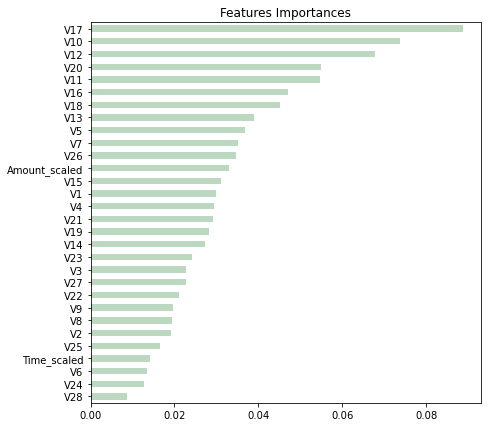

In [41]:
# Create a pd.Series of features importances
importances = pd.Series(data=rfc.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#BCD8C1')
plt.title('Features Importances')
plt.show() 

## Adaboots
An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [42]:


# Instantiate ada
ada = AdaBoostClassifier()

# Fit ada to the training set
ada.fit(X_train,y_train)

# Get predicting values
predicted=ada.predict(X_test)


# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [43]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2393
           1       1.00      0.14      0.25         7

    accuracy                           1.00      2400
   macro avg       1.00      0.57      0.62      2400
weighted avg       1.00      1.00      1.00      2400



Confusion matrix for the test set
[[2393    0]
 [   6    1]]


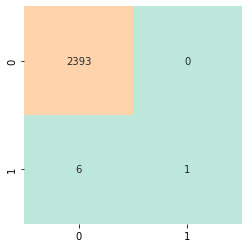

In [44]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted))
conf_mat = confusion_matrix(y_test,predicted)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [45]:
# Predict probabilities
y_pred_probs_ada = ada.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of Adaboots classifier: ",roc_auc_score(y_test,y_pred_probs_ada ))

roc_auc_score of Adaboots classifier:  0.9417348218016834


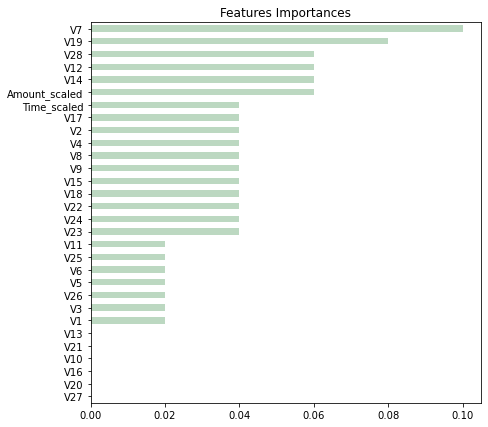

In [46]:
# Create a pd.Series of features importances
importances = pd.Series(data=ada.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#BCD8C1')
plt.title('Features Importances')
plt.show() 

## Gradient Boosting 

In [47]:


# Instantiate ada
gbc= GradientBoostingClassifier()

# Fit ada to the training set
gbc.fit(X_train,y_train)

# Get predicting values
y_predicted_gbc=gbc.predict(X_test)


# Compute the probabilities of obtaining the positive class
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]

In [48]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_gbc))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2393
           1       0.50      0.43      0.46         7

    accuracy                           1.00      2400
   macro avg       0.75      0.71      0.73      2400
weighted avg       1.00      1.00      1.00      2400



Confusion matrix for the test set
[[2390    3]
 [   4    3]]


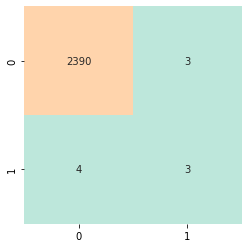

In [49]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_gbc))
conf_mat = confusion_matrix(y_test,y_predicted_gbc)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [50]:
# Predict probabilities
y_pred_probs_gbc = gbc.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of Gradient Booster classifier: ",roc_auc_score(y_test,y_pred_probs_gbc ))

roc_auc_score of Gradient Booster classifier:  0.7045549519431676


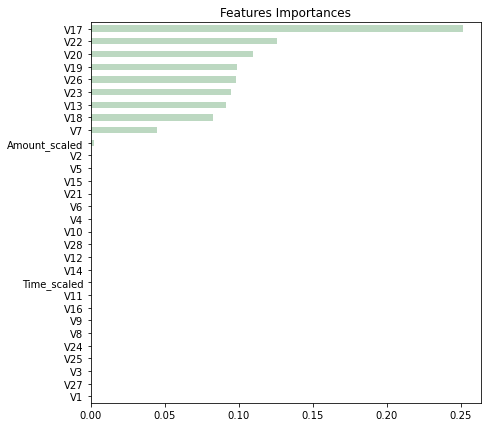

In [51]:
# Create a pd.Series of features importances
importances = pd.Series(data=gbc.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#BCD8C1')
plt.title('Features Importances')
plt.show() 

### Histogram-based Gradient Boosting Classification Tree

This estimator is much faster than GradientBoostingClassifier for big datasets (n_samples >= 10 000).

In [52]:
# Instantiate histGradientBoostingClassifier
hgbc= HistGradientBoostingClassifier()

# Fit ada to the training set
hgbc.fit(X_train,y_train)

# Get predicting values
y_predicted_hgbc=hgbc.predict(X_test)


# Compute the probabilities of obtaining the positive class
y_pred_proba_hgbc = hgbc.predict_proba(X_test)[:,1]

In [53]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_hgbc))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2393
           1       1.00      0.43      0.60         7

    accuracy                           1.00      2400
   macro avg       1.00      0.71      0.80      2400
weighted avg       1.00      1.00      1.00      2400



Confusion matrix for the test set
[[2393    0]
 [   4    3]]


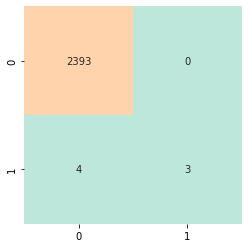

In [54]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_hgbc))
conf_mat = confusion_matrix(y_test,y_predicted_hgbc)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [55]:
# Predict probabilities
y_pred_probs_hgbc = hgbc.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of Gradient Booster classifier: ",roc_auc_score(y_test,y_pred_probs_hgbc ))

roc_auc_score of Gradient Booster classifier:  0.9948659781505582


## Model Comparison

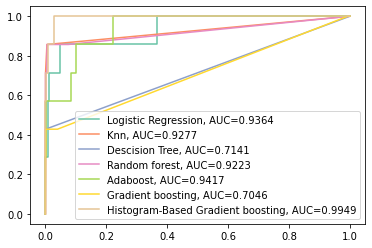

In [56]:
#logistic regression
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs)
auc = round(metrics.roc_auc_score(y_test, y_pred_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))




#knn
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_knn)
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_knn), 4)
plt.plot(fpr,tpr,label="Knn, AUC="+str(auc))



#decision tree
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_dtc)
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_dtc), 4)
plt.plot(fpr,tpr,label="Descision Tree, AUC="+str(auc))


#random forest
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_rfc)
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_rfc), 4)
plt.plot(fpr,tpr,label="Random forest, AUC="+str(auc))


#adaboost
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_ada )
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_ada), 4)
plt.plot(fpr,tpr,label="Adaboost, AUC="+str(auc))

#gradient Boosting
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_gbc )
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_gbc), 4)
plt.plot(fpr,tpr,label="Gradient boosting, AUC="+str(auc))


#histgradientbooting
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_hgbc )
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_hgbc), 4)
plt.plot(fpr,tpr,label="Histogram-Based Gradient boosting, AUC="+str(auc))



plt.legend()




## Logistic Regression with hyperparameter tunning

In [67]:
#Let's use GridSearch in order to find the best parameters for our logistic Regression model:

#First we define the evaluation metrics:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#We create a dictionary for our hyperparameters:
hyperparameters = {"penalty": ['none', 'l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],"solver" : ['newton-cg', 'lbfgs', 'liblinear']}

gridsearch = GridSearchCV(LogisticRegression(), hyperparameters, scoring='accuracy', n_jobs=-1, cv=cv)
best_model = gridsearch.fit(X_train, y_train)
print(best_model.best_params_)

KeyboardInterrupt: 

In [67]:
#Define our model
logreg=LogisticRegression(C=0.001,penalty="none",solver='newton-cg')

#fit our the model with our training set
logreg.fit(X_train,y_train)


# Get predicting values

y_predicted_logreg=logreg.predict(X_test)
#predicted_y_train=model.predict(X_train)


C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [68]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_logreg))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.64      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix for the test set
[[85279    16]
 [   54    94]]


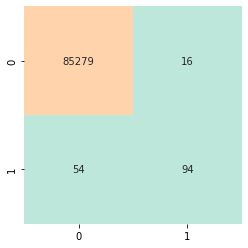

In [69]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_logreg))
conf_mat = confusion_matrix(y_test,y_predicted_logreg)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [70]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of logistic regression classifier: ",roc_auc_score(y_test, y_pred_probs))

roc_auc_score of logistic regression classifier:  0.9876103285418018


Conclusions:
    Data analysis with imbalance data is bias. All our model are better predicting the class 0 
    Possible overfitting
    

##  Synthetic Minority Oversampling Technique (SMOTE)

In order to treat the data imbanlance we can use oversampling and undersampling techniques. SMOTE is an oversampling technique. 

In [4]:

X=df.iloc[:,0:30].values
y=df.Class.values

In [5]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (5050, 30)
y shape: (5050,)


In [6]:

# Define the resampling method
method = SMOTE(random_state=42)


In [7]:
# Create the resampled feature set
X_sm, y_sm = method.fit_resample(X, y)

In [8]:
pd.value_counts(pd.Series(y_sm))


0    5000
1    5000
dtype: int64

# Plot the resampled data
plot_data(X_sm, y_sm)

def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    sns.set_palette("Set2")
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15)
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_sm[y_sm == 0, 0], X_sm[y_sm == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_sm[y_sm == 1, 0], X_sm[y_sm == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15)
    plt.title(method)
    plt.legend()
    plt.show()

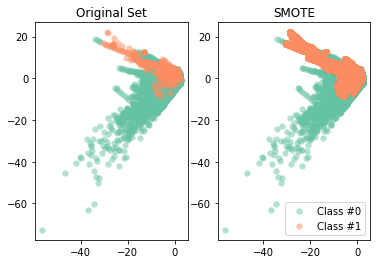

In [84]:
compare_plot(X, y, X_sm, y_sm, method='SMOTE')

## Logistic Regression combined with SMOTE

In [23]:


#Define the resampling method and the model the model:
resampling = SMOTE()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# XY split:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=0)


#fit the pipeline into the training set:
pipeline.fit(X_train, y_train) 

#Get predictions:
predicted_logreg_sm = pipeline.predict(X_test)

#Calculate the accuracy
print("accuracy for logistic regression combined with SMOTE: ",accuracy_score(y_test, predicted_logreg_sm))

TypeError: __init__() got an unexpected keyword argument 'kind'

In [16]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted_logreg_sm))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1505
           1       0.40      1.00      0.57        10

    accuracy                           0.99      1515
   macro avg       0.70      1.00      0.78      1515
weighted avg       1.00      0.99      0.99      1515



Confusion matrix for the test set
[[1490   15]
 [   0   10]]


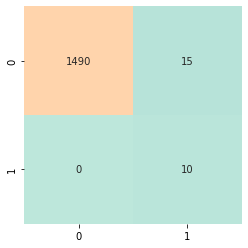

In [18]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test,predicted_logreg_sm))
conf_mat = confusion_matrix(y_test,predicted_logreg_sm)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [88]:
# Predict probabilities
y_pred_probs = model.predict_proba(X_test)[:,1]

In [90]:
#Calculate the accuracy
print("accuracy for logistic regression combined with SMOTE: ",accuracy_score(y_test, predicted_sm))

accuracy for logistic regression combined with SMOTE:  0.9772128787612795


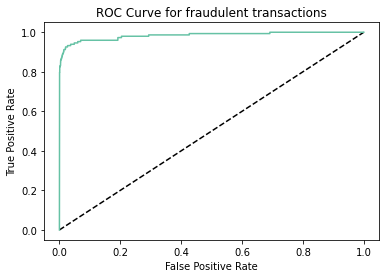

roc_auc_score of logistic regression classifier:  0.9837853285021936


In [91]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for fraudulent transactions')
plt.show()



#Calculate roc_auc_score
print("roc_auc_score of logistic regression classifier: ",roc_auc_score(y_test, y_pred_probs))

In [ ]:
models = {"Logistic Regression": logreg, "Decision Trees": dtc, "Random Forest": rfc}
results = []

# Loop through the models' values
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
model_pipeline = [ logreg,dtc,rfc]
model_names = ['Logistic Regresion','Decision Tree','Random Forest']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)